# RPS Performance Analysis

This notebook analyzes the performance results from the Rashomon Partition Set (RPS) algorithm simulation study. 

The simulation varies:
- **M**: Number of features (3, 4, 5)
- **R**: Factor levels per feature (3, 4, 5) 
- **H**: Maximum number of pools (multipliers: 1.0, 1.5, 2.0)
- **ε (epsilon)**: Rashomon threshold (0.5, 1.0, 2.0, 4.0)

For each parameter combination, we analyze:
- **Runtime performance** of the RPS algorithm
- **Accuracy** in terms of pool mean errors
- **Coverage** comparing RPS partitions found vs. total possible partitions

## 1. Import Required Libraries

In [6]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Setup 1

In [7]:
# Load the simulation results
results_dir = "../Results/timed_sims/setup_1"

fnames = os.listdir(results_dir)

df = None
for fname in fnames:
    if fname.endswith(".csv"):
        file_path = os.path.join(results_dir, fname)
        temp_df = pd.read_csv(file_path)
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], ignore_index=True)
        print(f"✅ Loaded {fname} with {len(temp_df)} rows")


df["RPS_frac"] = df["num_rps_partitions"] / df["total_partitions"]

df.head()

✅ Loaded rps_performance_results_4_4_setup_1.csv with 130 rows
✅ Loaded rps_performance_results_3_4_setup_1.csv with 130 rows


,M,R_val,epsilon,seed,n_per_policy,all_partitions_time,rps_time,total_partitions,num_rps_partitions,map_q_value,map_posterior_prob,norm_constant,rps_norm_constant,theta_used,found_true_partition,rps_posterior_beta_error,full_posterior_beta_error,RPS_frac
0,4,4,0.01,0,30,0.721313,2.344078,4096,2,2.14692,0.00902,12.954478,0.231970,2.168389,0,9.044051,7.584417,0.000488
1,4,4,0.05,0,30,0.721313,2.374645,4096,12,2.14692,0.00902,12.954478,1.305875,2.254266,0,8.652294,7.584417,0.002930
2,4,4,0.10,0,30,0.721313,2.526453,4096,24,2.14692,0.00902,12.954478,2.493318,2.361612,0,8.628271,7.584417,0.005859
3,4,4,0.15,0,30,0.721313,2.470802,4096,48,2.14692,0.00902,12.954478,4.622945,2.468958,0,8.413214,7.584417,0.011719
4,4,4,0.20,0,30,0.721313,2.442182,4096,64,2.14692,0.00902,12.954478,5.892863,2.576304,0,8.290983,7.584417,0.015625


In [3]:
df_summary = df.groupby(["M", "epsilon", "R_val"]).agg(
    mean_time=("rps_time", "mean"),
    std_time=("rps_time", "std"),
    mean_frac=("RPS_frac", "mean")
)

df_summary = df_summary.reset_index()

df_m3 = df_summary[df_summary["M"] == 3]
print(df_m3.head())

df_m4 = df_summary[df_summary["M"] == 4]
print(df_m4.head())

   M  epsilon  R_val  mean_time  std_time  mean_frac
0  3     0.01      4   0.212937  0.003403   0.001953
1  3     0.05      4   0.216917  0.013475   0.001953
2  3     0.10      4   0.214301  0.004154   0.002344
3  3     0.15      4   0.219290  0.003278   0.007422
4  3     0.20      4   0.223405  0.002919   0.013086
    M  epsilon  R_val  mean_time  std_time  mean_frac
13  4     0.01      4   2.372712  0.203485   0.000439
14  4     0.05      4   2.429296  0.249846   0.002393
15  4     0.10      4   2.446412  0.190294   0.005713
16  4     0.15      4   2.535090  0.255481   0.011499
17  4     0.20      4   2.590260  0.318574   0.015356


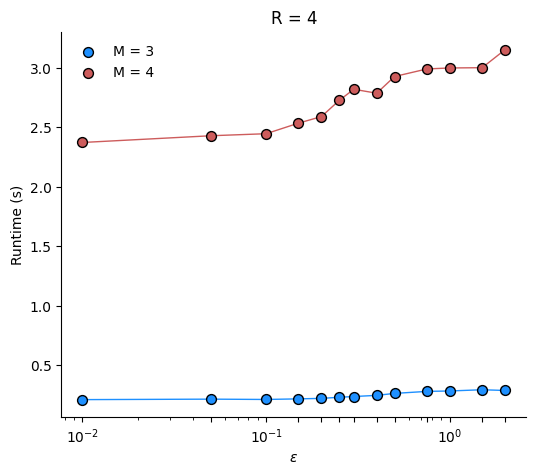

In [8]:
# Plot rps_mean_time against R_val

plt.figure(figsize=(6, 5))


# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(df_m3["epsilon"], df_m3["mean_time"], color="dodgerblue", linewidth=1, zorder=1)
plt.scatter(df_m3["epsilon"], df_m3["mean_time"], s=50,
            color="dodgerblue", edgecolor="black", zorder=2,
         label="M = 3")

plt.plot(df_m4["epsilon"], df_m4["mean_time"], color="indianred", linewidth=1, zorder=1)
plt.scatter(df_m4["epsilon"], df_m4["mean_time"], s=50,
            color="indianred", edgecolor="black", zorder=2,
         label="M = 4")

plt.xscale("log")
plt.xticks(df_m3["epsilon"])

plt.xlabel(r"$\epsilon$")
plt.ylabel("Runtime (s)")
plt.title("R = 4")

# Add legend
plt.legend(loc="upper left", fontsize=10, frameon=False)

plt.savefig("../Figures/timed_sims/rps_runtime_vs_epsilon.pdf", bbox_inches="tight", dpi=300)

plt.show()

### Error plots

In [9]:
# Load the simulation results
results_dir = "../Results/timed_sims/setup_1"

fnames = os.listdir(results_dir)

results_m3 = []
results_m4 = []
for fname in fnames:
    if fname.endswith(".pkl"):
        file_path = os.path.join(results_dir, fname)
        with open(file_path, "rb") as f:
            temp_results = pickle.load(f)
            if "M3" in fname:
                results_m3.append(temp_results)
            elif "M4" in fname:
                results_m4.append(temp_results)

print(f"✅ Loaded {len(results_m3)} results from {len(fnames)} files for M = 3")
print(f"✅ Loaded {len(results_m4)} results from {len(fnames)} files for M = 4")

✅ Loaded 10 results from 22 files for M = 3
✅ Loaded 10 results from 22 files for M = 4


In [54]:
def error_results(results, M, R):
    errors = None
    for result in results:
        q = result["all_q_values"]
        q = np.sort(q)
        epsilon = q / q[0] - 1

        space_size = 2 ** (M * (R - 2))
        num_partitions = q.shape[0]
        posterior = np.exp(-q)
        posterior = posterior / np.sum(posterior)

        # rps_size = np.linspace(1, num_partitions, num_partitions)
        # for each posterior value, count how many partitions have a value less than or equal to the posterior value
        rps_size = np.arange(1, num_partitions + 1)
        lambda_est = posterior * rps_size

        # error = 1 / lambda_est - lambda_est
        error = 2 * (1 - lambda_est)
        error_2 = 2 * posterior * (space_size - rps_size)
        # error_3 = 1 + posterior * (space_size - 2 * rps_size)
        error_3 = np.ones(shape=error.shape)
        error_4 = np.min(np.vstack((error, error_2, error_3)), axis=0)

        df_temp = pd.DataFrame({
            "epsilon": epsilon,
            "rps_size": rps_size,
            "posterior": posterior,
            "lambda_est": lambda_est,
            "error": error,
            "error2": error_2,
            "error3": error_3,
            "error4": error_4,
            "theta": posterior
        })

        if errors is None:
            errors = df_temp
        else:
            errors = pd.concat([errors, df_temp], ignore_index=True)

    return errors

errors_m3 = error_results(results_m3, M = 3, R = 4)
# print(errors_m3.head())

errors_m4 = error_results(results_m4, M = 4, R = 4)
# print(errors_m4.head())

In [66]:
def errors_summary(errors):
    summary = errors.groupby("rps_size").agg(
        mean_epsilon=("epsilon", "mean"),
        mean_theta=("theta", "mean"),
        mean_error=("error", "mean"),
        mean_error2=("error2", "mean"),
        mean_error3=("error3", "mean"),
        mean_error4=("error4", "mean"),
        std_error=("error", "std")
    ).reset_index()
    return summary

summary_m3 = errors_summary(errors_m3)
print(summary_m3.head())

summary_m4 = errors_summary(errors_m4)
print(summary_m4.head())

error_ylabel = "Rashomon Approximation Error"
error_label1 = r"2(1 - $|P_{\theta}|\theta$)"
error_label2 = r"2$(|P^{\star}| - |P_{\theta}|)\theta$"
error_label3 = "Full Error"

   rps_size  mean_epsilon  mean_theta  mean_error  mean_error2  mean_error3  \
0         1      0.000000    0.029856    1.940289     3.761804          1.0   
1         2      0.116313    0.025125    1.899498     3.115562          1.0   
2         3      0.133638    0.024515    1.852909     2.990842          1.0   
3         4      0.147335    0.023998    1.808018     2.879732          1.0   
4         5      0.178930    0.022900    1.770998     2.702221          1.0   

   mean_error4  std_error  
0          1.0   0.002375  
1          1.0   0.002473  
2          1.0   0.005784  
3          1.0   0.004582  
4          1.0   0.003662  
   rps_size  mean_epsilon  mean_theta  mean_error  mean_error2  mean_error3  \
0         1      0.000000    0.009082    1.981835     4.631983          1.0   
1         2      0.008495    0.008917    1.964332     4.529873          1.0   
2         3      0.014365    0.008805    1.947171     4.455206          1.0   
3         4      0.027552    0.008558    

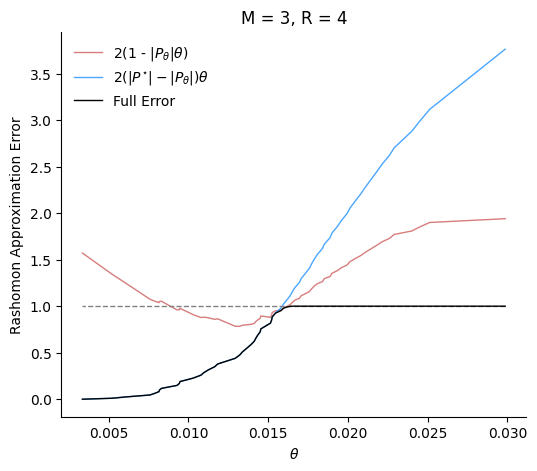

In [73]:
# Plot rps_mean_time against R_val

plt.figure(figsize=(6, 5))


# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(summary_m3["mean_theta"], summary_m3["mean_error"], color="indianred", linewidth=1,
         zorder=1, alpha=0.8, label=error_label1)
plt.plot(summary_m3["mean_theta"], summary_m3["mean_error2"], color="dodgerblue", linewidth=1,
         zorder=1, alpha=0.8, label=error_label2)
plt.plot(summary_m3["mean_theta"], summary_m3["mean_error3"], color="grey", linewidth=1,
         zorder=1, linestyle="--")
plt.plot(summary_m3["mean_theta"], summary_m3["mean_error4"], color="black", linewidth=1,
         zorder=2, label=error_label3)

# Reverse x-axis 
# plt.gca().invert_xaxis()

plt.xlabel(r"$\theta$")
# plt.ylabel(r"$1 / \theta |P_{\theta}| - \theta |P_{\theta}|$")
plt.ylabel(error_ylabel)
plt.title("M = 3, R = 4")

plt.legend(loc="upper left", fontsize=10, frameon=False)

plt.savefig("../Figures/full_errors/rps_error_vs_theta_M3.pdf", bbox_inches="tight", dpi=300)

plt.show()

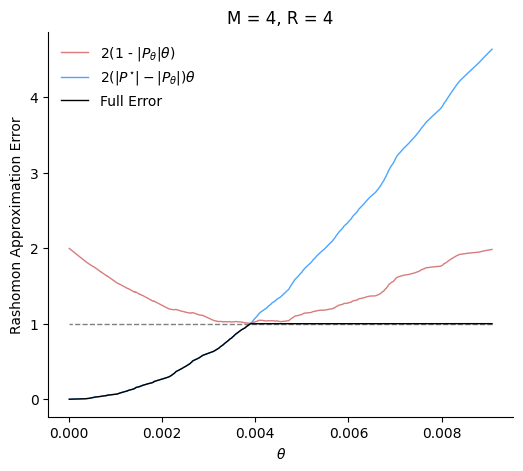

In [72]:
# Plot rps_mean_time against R_val

plt.figure(figsize=(6, 5))


# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.plot(summary_m4["mean_theta"], summary_m4["mean_error"], color="indianred", linewidth=1,
         zorder=1, alpha=0.8, label=error_label1)
plt.plot(summary_m4["mean_theta"], summary_m4["mean_error2"], color="dodgerblue", linewidth=1,
         zorder=1, alpha=0.8, label=error_label2)
plt.plot(summary_m4["mean_theta"], summary_m4["mean_error3"], color="grey", linewidth=1,
         zorder=1, linestyle="--")
plt.plot(summary_m4["mean_theta"], summary_m4["mean_error4"], color="black", linewidth=1,
         zorder=2, label=error_label3)

# Reverse x-axis 
# plt.gca().invert_xaxis()

plt.xlabel(r"$\theta$")
# plt.ylabel(r"$1 / \theta |P_{\theta}| - \theta |P_{\theta}|$")
plt.ylabel(error_ylabel)
plt.title("M = 4, R = 4")

plt.legend(loc="upper left", fontsize=10, frameon=False)

plt.savefig("../Figures/full_errors/rps_error_vs_theta_M4.pdf", bbox_inches="tight", dpi=300)

plt.show()

## Setup 2

In [61]:
# Load the simulation results
results_dir = "../Results/timed_sims/setup_2"

fnames = os.listdir(results_dir)

df = None
for fname in fnames:
    if fname.endswith(".csv"):
        file_path = os.path.join(results_dir, fname)
        temp_df = pd.read_csv(file_path)
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], ignore_index=True)
        print(f"✅ Loaded {fname} with {len(temp_df)} rows")


df["RPS_frac"] = df["num_rps_partitions"] / df["total_partitions"]

df.head()

✅ Loaded rps_performance_results_3_8_setup_2.csv with 10 rows
✅ Loaded rps_performance_results_3_4_setup_2.csv with 10 rows
✅ Loaded rps_performance_results_3_7_setup_2.csv with 10 rows
✅ Loaded rps_performance_results_3_5_setup_2.csv with 10 rows
✅ Loaded rps_performance_results_3_6_setup_2.csv with 10 rows


,M,R_val,epsilon,seed,n_per_policy,all_partitions_time,rps_time,total_partitions,num_rps_partitions,map_q_value,map_posterior_prob,norm_constant,rps_norm_constant,theta_used,found_true_partition,rps_posterior_beta_error,full_posterior_beta_error,RPS_frac
0,3,8,0.01,0,30,NaN,7217.514640,2097152,17670,3.673129,NaN,NaN,765.444640,3.709861,1,14.987579,NaN,0.008426
1,3,8,0.01,1,30,NaN,6893.647254,2097152,17840,3.692211,NaN,NaN,768.187964,3.729134,1,15.076641,NaN,0.008507
2,3,8,0.01,2,30,NaN,6818.676449,2097152,17420,3.698361,NaN,NaN,729.677130,3.735345,1,15.004870,NaN,0.008307
3,3,8,0.01,3,30,NaN,6738.298382,2097152,17703,3.687901,NaN,NaN,758.913962,3.724780,1,15.014146,NaN,0.008441
4,3,8,0.01,4,30,NaN,6748.116896,2097152,17737,3.686775,NaN,NaN,763.899016,3.723643,1,15.068315,NaN,0.008458


In [62]:
df_summary = df.groupby(["M", "epsilon", "R_val"]).agg(
    mean_time=("rps_time", "mean"),
    std_time=("rps_time", "std"),
    mean_frac=("RPS_frac", "mean")
)

df_summary = df_summary.reset_index()

df_summary.head()

,M,epsilon,R_val,mean_time,std_time,mean_frac
0,3,0.01,4,0.163349,0.003910,0.017383
1,3,0.01,5,2.414450,0.088080,0.000488
2,3,0.01,6,37.319845,1.353425,0.005649
3,3,0.01,7,635.702722,70.177434,0.045068
4,3,0.01,8,6605.096419,337.501463,0.008436


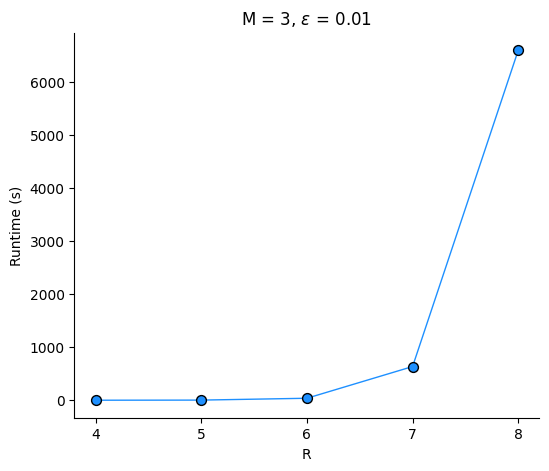

In [63]:
# Plot rps_mean_time against R_val

plt.figure(figsize=(6, 5))


# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(df_summary["R_val"], df_summary["mean_time"], color="dodgerblue", linewidth=1, zorder=1)
plt.scatter(df_summary["R_val"], df_summary["mean_time"], s=50,
            color="dodgerblue", edgecolor="black", zorder=2)

plt.xticks(df_summary["R_val"])

plt.xlabel("R")
plt.ylabel("Runtime (s)")
plt.title(r"M = 3, $\epsilon$ = 0.01")

plt.savefig("../Figures/timed_sims/rps_runtime_vs_R.pdf", bbox_inches="tight", dpi=300)

plt.show()

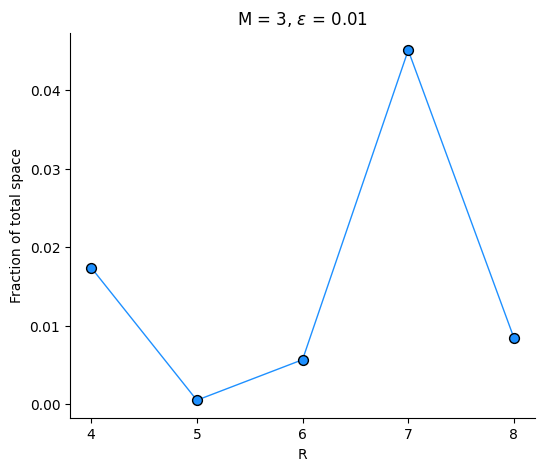

In [64]:
# Plot rps_mean_time against R_val

plt.figure(figsize=(6, 5))


# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(df_summary["R_val"], df_summary["mean_frac"], color="dodgerblue", linewidth=1, zorder=1)
plt.scatter(df_summary["R_val"], df_summary["mean_frac"], s=50,
            color="dodgerblue", edgecolor="black", zorder=2)

plt.xticks(df_summary["R_val"])

plt.xlabel("R")
plt.ylabel("Fraction of total space")
plt.title(r"M = 3, $\epsilon$ = 0.01")

plt.savefig("../Figures/timed_sims/rps_frac_vs_R.pdf", bbox_inches="tight", dpi=300)

plt.show()

## Setup 3

In [65]:
# Load the simulation results
results_dir = "../Results/timed_sims/setup_3"

fnames = os.listdir(results_dir)

df = None
for fname in fnames:
    if fname.endswith(".csv"):
        file_path = os.path.join(results_dir, fname)
        temp_df = pd.read_csv(file_path)
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], ignore_index=True)
        print(f"✅ Loaded {fname} with {len(temp_df)} rows")


df["RPS_frac"] = df["num_rps_partitions"] / df["total_partitions"]

df.head()

✅ Loaded rps_performance_results_4_4_setup_3.csv with 10 rows
✅ Loaded rps_performance_results_3_4_setup_3.csv with 10 rows
✅ Loaded rps_performance_results_7_4_setup_3.csv with 10 rows
✅ Loaded rps_performance_results_6_4_setup_3.csv with 10 rows
✅ Loaded rps_performance_results_5_4_setup_3.csv with 10 rows


,M,R_val,epsilon,seed,n_per_policy,all_partitions_time,rps_time,total_partitions,num_rps_partitions,map_q_value,map_posterior_prob,norm_constant,rps_norm_constant,theta_used,found_true_partition,rps_posterior_beta_error,full_posterior_beta_error,RPS_frac
0,4,4,0.01,0,30,NaN,1.998042,4096,163,3.344252,NaN,NaN,11.355616,3.377695,1,7.839325,NaN,0.039795
1,4,4,0.01,1,30,NaN,1.851931,4096,163,3.399652,NaN,NaN,10.817549,3.433649,1,7.833604,NaN,0.039795
2,4,4,0.01,2,30,NaN,1.862751,4096,166,3.381641,NaN,NaN,11.478049,3.415458,1,7.860923,NaN,0.040527
3,4,4,0.01,3,30,NaN,1.922495,4096,163,3.396016,NaN,NaN,10.692964,3.429976,1,7.819222,NaN,0.039795
4,4,4,0.01,4,30,NaN,1.871149,4096,162,3.324689,NaN,NaN,11.624107,3.357936,1,7.832864,NaN,0.039551


In [66]:
df_summary = df.groupby(["M", "epsilon", "R_val"]).agg(
    mean_time=("rps_time", "mean"),
    std_time=("rps_time", "std"),
    mean_frac=("RPS_frac", "mean")
)

df_summary = df_summary.reset_index()

df_summary.head()

,M,epsilon,R_val,mean_time,std_time,mean_frac
0,3,0.01,4,0.169518,0.005773,0.017383
1,4,0.01,4,1.978672,0.126095,0.040063
2,5,0.01,4,27.945956,1.216192,0.009157
3,6,0.01,4,467.738562,54.224442,0.000006
4,7,0.01,4,6992.009005,385.667650,0.006043


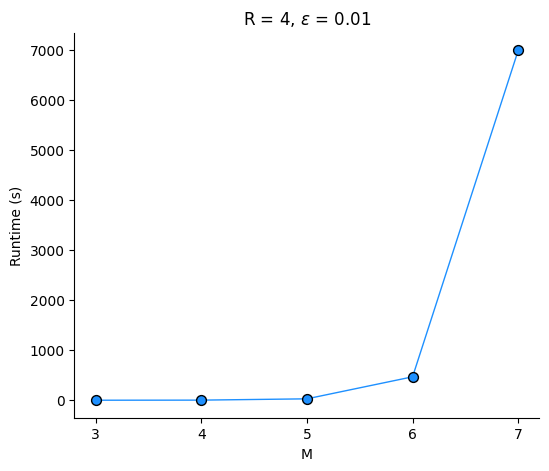

In [67]:
# Plot rps_mean_time against R_val

plt.figure(figsize=(6, 5))


# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(df_summary["M"], df_summary["mean_time"], color="dodgerblue", linewidth=1, zorder=1)
plt.scatter(df_summary["M"], df_summary["mean_time"], s=50,
            color="dodgerblue", edgecolor="black", zorder=2)

plt.xticks(df_summary["M"])

plt.xlabel("M")
plt.ylabel("Runtime (s)")
plt.title(r"R = 4, $\epsilon$ = 0.01")

plt.savefig("../Figures/timed_sims/rps_runtime_vs_M.pdf", bbox_inches="tight", dpi=300)

plt.show()

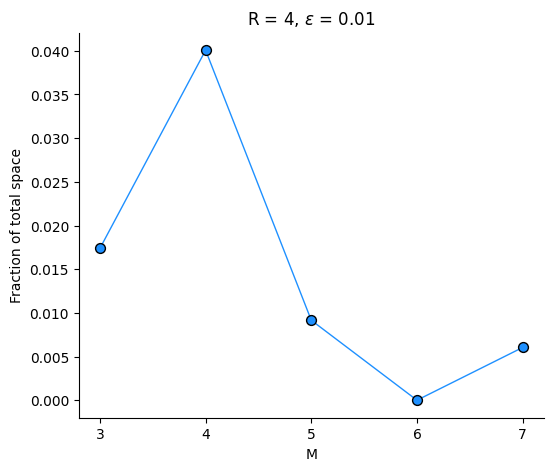

In [68]:
# Plot rps_mean_time against R_val

plt.figure(figsize=(6, 5))


# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.plot(df_summary["M"], df_summary["mean_frac"], color="dodgerblue", linewidth=1, zorder=1)
plt.scatter(df_summary["M"], df_summary["mean_frac"], s=50,
            color="dodgerblue", edgecolor="black", zorder=2)

plt.xticks(df_summary["M"])

plt.xlabel("M")
plt.ylabel("Fraction of total space")
plt.title(r"R = 4, $\epsilon$ = 0.01")

plt.savefig("../Figures/timed_sims/rps_frac_vs_M.pdf", bbox_inches="tight", dpi=300)

plt.show()